In [12]:
import numpy as np

import matplotlib.pyplot as plt


Exercise 6

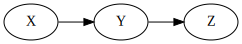

In [13]:
from graphviz import Digraph

b = Digraph()
b.attr(rankdir='LR')
b.edge('X', 'Y')
b.edge('Y', 'Z')
b

In [14]:
#probabilities
p_X = np.array([0.6, 0.4])
p_Y_given_X = np.array([[0.2, 0.8],
                        [0.4, 0.6]])
p_Z_given_Y = np.array([[0.2, 0.4, 0.4],
                        [0.3, 0.3, 0.4]])

In [15]:
samples = []
for _ in range(1000):
  X = np.random.choice([0, 1], p=p_X)
  Y = np.random.choice([0, 1], p=p_Y_given_X[X])
  Z = np.random.choice([0, 1, 2], p=p_Z_given_Y[Y])
  samples.append((X, Y, Z))

len(samples)

1000

In [16]:
#calcoliamo la joint distribution vera
true_p_XYZ = {}
for x in range(2):
  for y in range(2):
    for z in range(3):
      true_p_XYZ[(x, y, z)] = p_X[x] * p_Y_given_X[x][y] * p_Z_given_Y[y][z]

print("True probabilities:")
for xyz, prob in true_p_XYZ.items():
  print(f"P(X={xyz[0]}, Y={xyz[1]}, Z={xyz[2]}) = {prob:.4f}")

True probabilities:
P(X=0, Y=0, Z=0) = 0.0240
P(X=0, Y=0, Z=1) = 0.0480
P(X=0, Y=0, Z=2) = 0.0480
P(X=0, Y=1, Z=0) = 0.1440
P(X=0, Y=1, Z=1) = 0.1440
P(X=0, Y=1, Z=2) = 0.1920
P(X=1, Y=0, Z=0) = 0.0320
P(X=1, Y=0, Z=1) = 0.0640
P(X=1, Y=0, Z=2) = 0.0640
P(X=1, Y=1, Z=0) = 0.0720
P(X=1, Y=1, Z=1) = 0.0720
P(X=1, Y=1, Z=2) = 0.0960


In [17]:
#stimiamo la joint distribution dai dati
count_XYZ = {}
for sample in samples:
  if sample in count_XYZ:
    count_XYZ[sample] += 1
  else:
    count_XYZ[sample] = 1

total_samples = len(samples)
p_XYZ = {xyz: count / total_samples for xyz, count in count_XYZ.items()}

print("Estimated probabilities:")
for xyz in sorted(p_XYZ):
  prob = p_XYZ[xyz]
  print(f"P(X={xyz[0]}, Y={xyz[1]}, Z={xyz[2]}) = {prob:.4f}")

Estimated probabilities:
P(X=0, Y=0, Z=0) = 0.0150
P(X=0, Y=0, Z=1) = 0.0520
P(X=0, Y=0, Z=2) = 0.0390
P(X=0, Y=1, Z=0) = 0.1280
P(X=0, Y=1, Z=1) = 0.1550
P(X=0, Y=1, Z=2) = 0.1880
P(X=1, Y=0, Z=0) = 0.0370
P(X=1, Y=0, Z=1) = 0.0760
P(X=1, Y=0, Z=2) = 0.0640
P(X=1, Y=1, Z=0) = 0.0830
P(X=1, Y=1, Z=1) = 0.0660
P(X=1, Y=1, Z=2) = 0.0970


In [18]:
#Bootstrap
B = 1000
def estimate_parameters(bootstrap_samples):
  count_XYZ = {}
  for sample in bootstrap_samples:
    if sample in count_XYZ:
      count_XYZ[sample] += 1
    else:
      count_XYZ[sample] = 1
  total_samples = len(bootstrap_samples)
  p_XYZ = {xyz: count / total_samples for xyz, count in count_XYZ.items()}
  return p_XYZ


t_boot = []
for _ in range(B):
  bootstrap_samples_indices = np.random.choice(len(samples), size=len(samples), replace=True)
  bootstrap_samples = [samples[i] for i in bootstrap_samples_indices]
  p_XYZ_bootstrap = estimate_parameters(bootstrap_samples)
  t_boot.append(p_XYZ_bootstrap)

parameter_means = {}
parameter_std_errors = {}
parameter_conf_intervals = {}
for xyz in p_XYZ.keys():
  parameter_estimates = [p_XYZ_bootstrap.get(xyz, 0) for p_XYZ_bootstrap in t_boot]
  parameter_means[xyz] = np.mean(parameter_estimates)
  parameter_std_errors[xyz] = np.std(parameter_estimates)
  parameter_conf_intervals[xyz] = (
    np.percentile(parameter_estimates, 2.5),
    np.percentile(parameter_estimates, 97.5)
  )

print("Parameter Estimates with Standard Errors and 95% Confidence Intervals:")
for xyz in sorted(p_XYZ):
  mean = parameter_means[xyz]
  std_error = parameter_std_errors[xyz]
  conf_interval = parameter_conf_intervals[xyz]
  print(f"P(X={xyz[0]}, Y={xyz[1]}, Z={xyz[2]}): Mean = {mean:.4f}, Std Error = {std_error:.4f}, CI = {conf_interval}")


Parameter Estimates with Standard Errors and 95% Confidence Intervals:
P(X=0, Y=0, Z=0): Mean = 0.0150, Std Error = 0.0039, CI = (0.008, 0.023)
P(X=0, Y=0, Z=1): Mean = 0.0519, Std Error = 0.0069, CI = (0.039, 0.06502499999999999)
P(X=0, Y=0, Z=2): Mean = 0.0389, Std Error = 0.0060, CI = (0.028, 0.051)
P(X=0, Y=1, Z=0): Mean = 0.1281, Std Error = 0.0104, CI = (0.107975, 0.14902499999999996)
P(X=0, Y=1, Z=1): Mean = 0.1552, Std Error = 0.0120, CI = (0.133, 0.17802499999999996)
P(X=0, Y=1, Z=2): Mean = 0.1880, Std Error = 0.0122, CI = (0.166, 0.212)
P(X=1, Y=0, Z=0): Mean = 0.0368, Std Error = 0.0058, CI = (0.025, 0.048)
P(X=1, Y=0, Z=1): Mean = 0.0762, Std Error = 0.0081, CI = (0.06, 0.092)
P(X=1, Y=0, Z=2): Mean = 0.0638, Std Error = 0.0075, CI = (0.051, 0.079)
P(X=1, Y=1, Z=0): Mean = 0.0830, Std Error = 0.0090, CI = (0.066, 0.102)
P(X=1, Y=1, Z=1): Mean = 0.0662, Std Error = 0.0079, CI = (0.052, 0.082)
P(X=1, Y=1, Z=2): Mean = 0.0968, Std Error = 0.0091, CI = (0.079, 0.116)


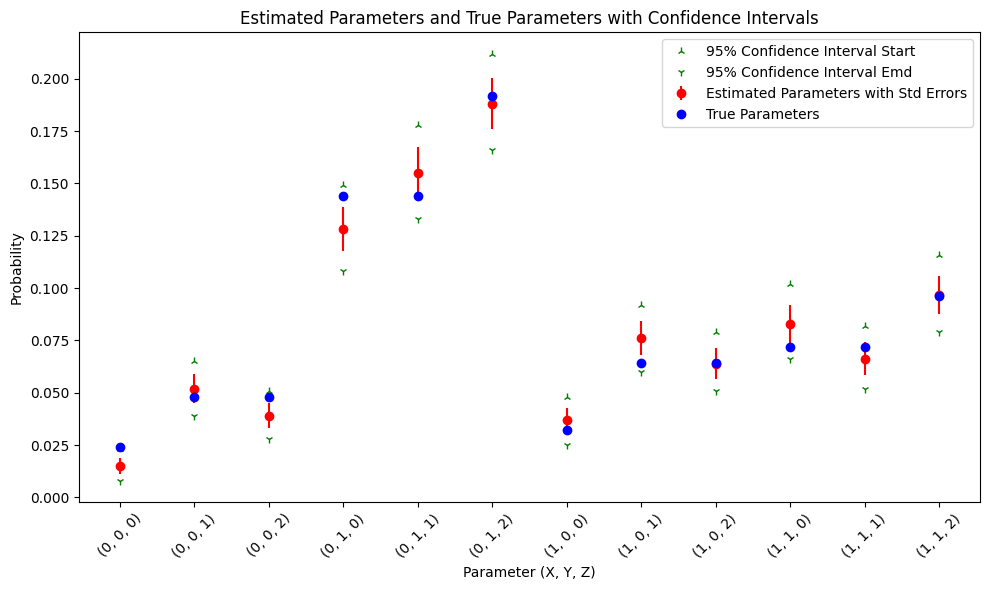

In [49]:
import matplotlib.pyplot as plt

true_parameters = [true_p_XYZ[xyz] for xyz in sorted(true_p_XYZ.keys())]

estimated_parameters = [parameter_means[xyz] for xyz in sorted(p_XYZ.keys())]
std_errors = [parameter_std_errors[xyz] for xyz in sorted(p_XYZ.keys())]
conf_intervals = [parameter_conf_intervals[xyz] for xyz in sorted(p_XYZ.keys())]

x = range(len(true_parameters))
plt.figure(figsize=(10, 6))
plt.errorbar(x, estimated_parameters, yerr= std_errors, fmt='o', color='r', label='Estimated Parameters with Std Errors')
plt.errorbar(x, true_parameters, fmt='o', color='b', label='True Parameters')
plt.plot(x, list(zip(*conf_intervals))[1], linestyle='', marker='2', color='g', label='95% Confidence Interval Start')
plt.plot(x, list(zip(*conf_intervals))[0], linestyle='', marker='1', color='g', label='95% Confidence Interval Emd')
plt.xticks(x, [f"({xyz[0]}, {xyz[1]}, {xyz[2]})" for xyz in sorted(p_XYZ.keys())], rotation=45)
plt.xlabel('Parameter (X, Y, Z)')
plt.ylabel('Probability')
plt.title('Estimated Parameters and True Parameters with Confidence Intervals')
plt.legend()
plt.tight_layout()
plt.show()


Exercise 8
